In [10]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for professional looking plots
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

print("Libraries Loaded Successfully")

Libraries Loaded Successfully


In [11]:
# Define the stock symbols (Tech Giants)
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Download data for the last 1 year
end = pd.Timestamp.now()
start = end - pd.DateOffset(years=1)

print(f"Downloading data from {start.date()} to {end.date()}...")

# Fetch data
company_data = {}
for stock in tech_list:
    company_data[stock] = yf.download(stock, start=start, end=end)

# Combine Closing prices into a single DataFrame for easier analysis
closing_df = yf.download(tech_list, start=start, end=end)['Close']

print("Data Download Complete.")
closing_df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  4 of 4 completed

Data Download Complete.


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-12-30,251.064499,221.300003,191.942764,421.719086
2024-12-31,249.292511,219.389999,189.701477,418.413452
2025-01-02,242.752106,220.220001,189.890747,415.514832
2025-01-03,242.264297,224.190002,192.381042,420.249939
2025-01-06,243.896912,227.610001,197.192322,424.716980


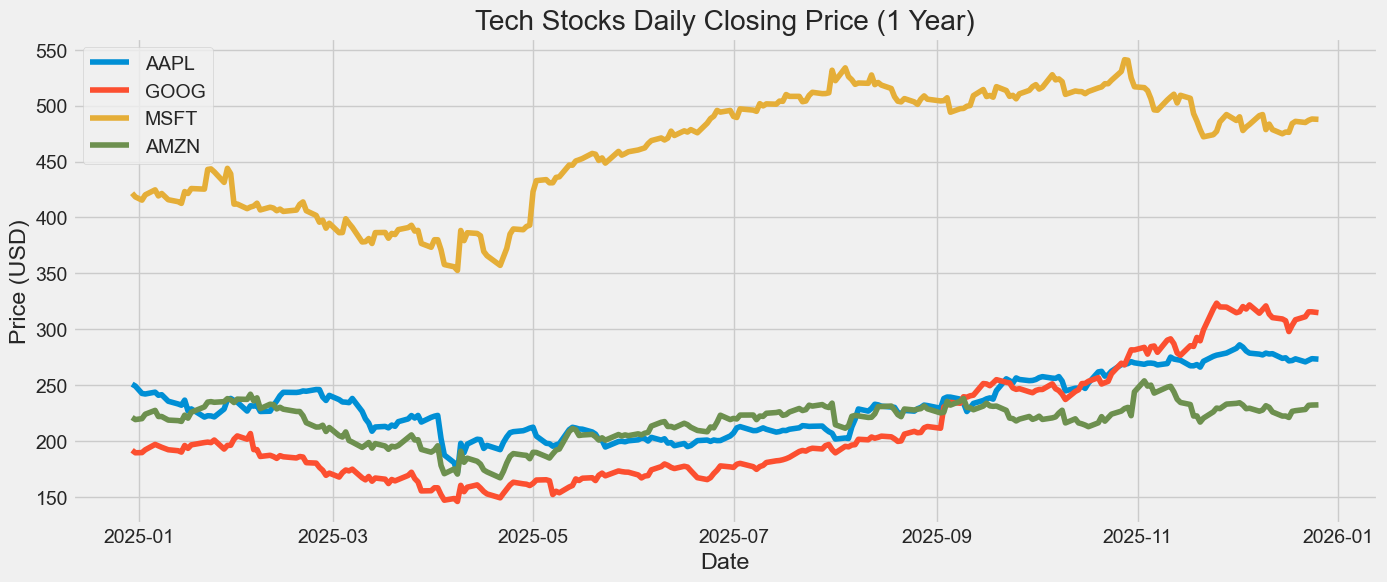

In [12]:
plt.figure(figsize=(15, 6))
for stock in tech_list:
    plt.plot(closing_df.index, closing_df[stock], label=stock)

plt.title('Tech Stocks Daily Closing Price (1 Year)')
plt.ylabel('Price (USD)')
plt.xlabel('Date')
plt.legend()
plt.show()

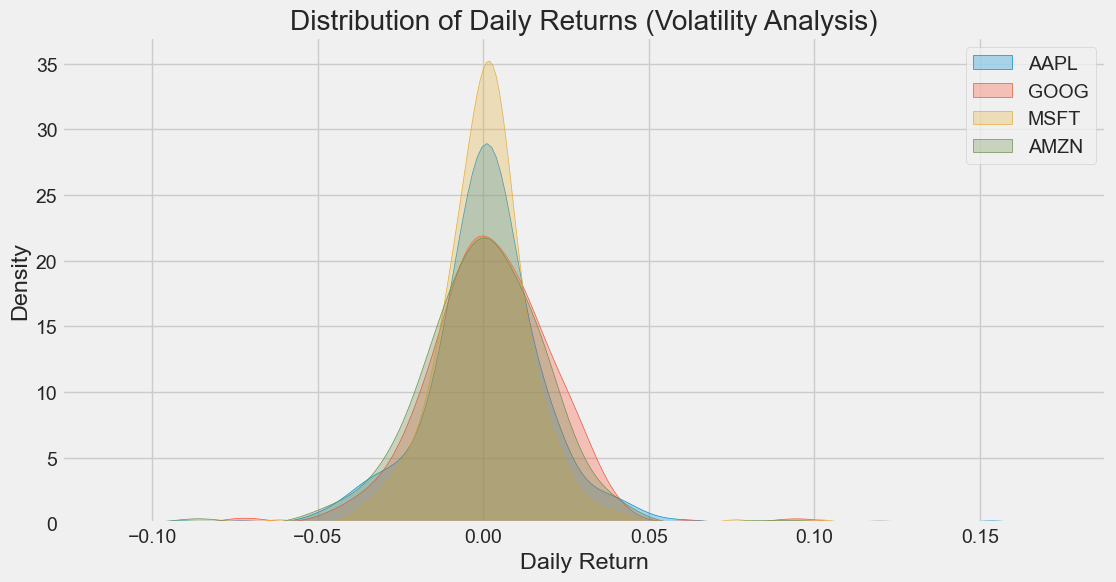

In [13]:
# Calculate Daily Returns (Percentage Change)
daily_returns = closing_df.pct_change().dropna()

plt.figure(figsize=(12, 6))
for stock in tech_list:
    sns.kdeplot(daily_returns[stock], label=stock, fill=True, alpha=0.3)

plt.title('Distribution of Daily Returns (Volatility Analysis)')
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.legend()
plt.show()

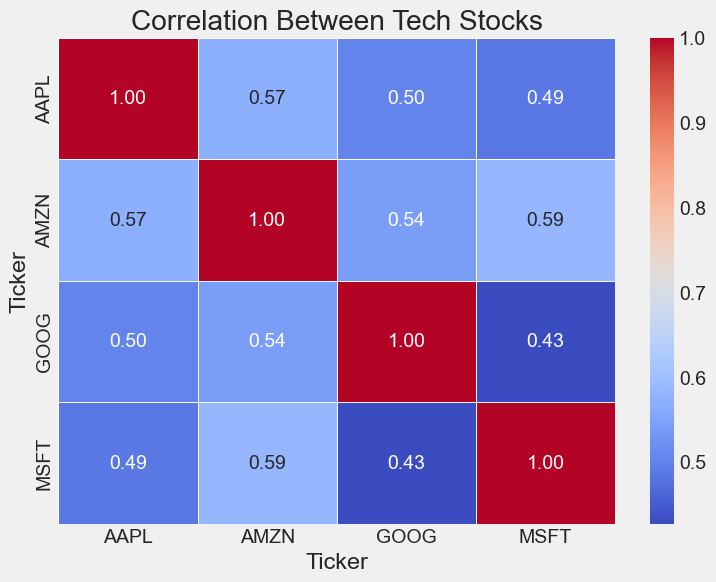

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(daily_returns.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Tech Stocks')
plt.show()

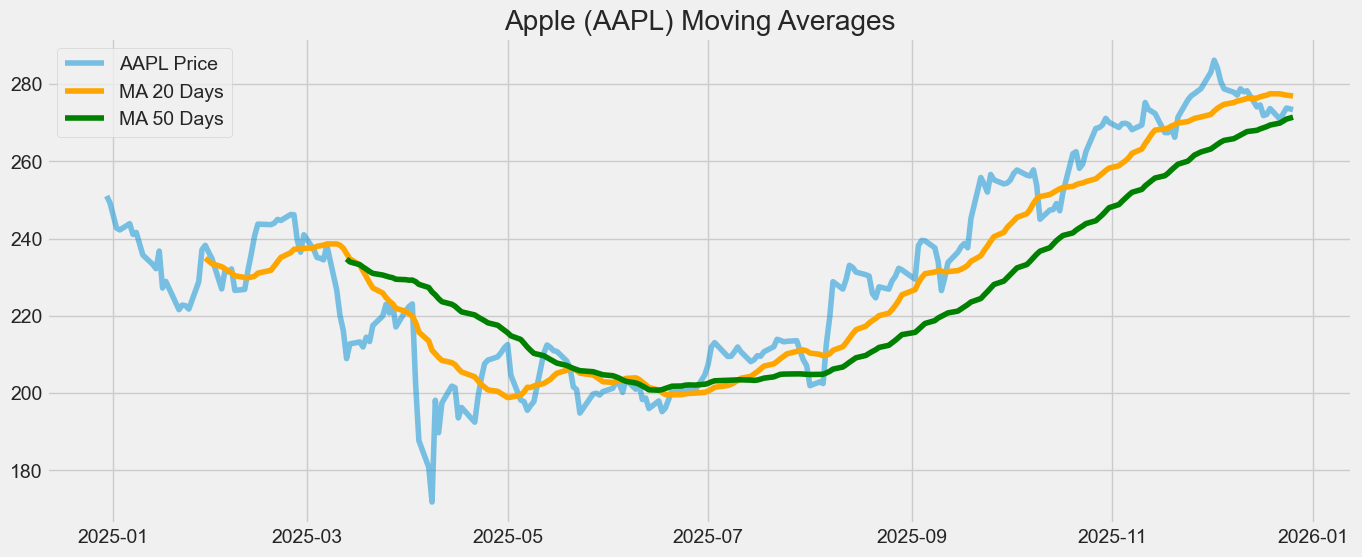

In [15]:
# Analyze specific stock: Apple
aapl_df = company_data['AAPL'].copy()

# Calculate Moving Averages
aapl_df['MA_20'] = aapl_df['Close'].rolling(window=20).mean()
aapl_df['MA_50'] = aapl_df['Close'].rolling(window=50).mean()

plt.figure(figsize=(15, 6))
plt.plot(aapl_df.index, aapl_df['Close'], label='AAPL Price', alpha=0.5)
plt.plot(aapl_df.index, aapl_df['MA_20'], label='MA 20 Days', color='orange')
plt.plot(aapl_df.index, aapl_df['MA_50'], label='MA 50 Days', color='green')

plt.title('Apple (AAPL) Moving Averages')
plt.legend()
plt.show()

# 5. Conclusion & Investment Insights 💡

Based on the historical data analysis of Apple (AAPL), Google (GOOG), Microsoft (MSFT), and Amazon (AMZN) over the past year, we can draw the following conclusions:

### 1. Trend Analysis 📈
* **Sector Movement:** All four tech giants displayed a generally positive trend, reinforcing the recovery and growth of the technology sector over the analyzed period.
* **Moving Averages:** The visualization of AAPL's 20-day and 50-day Moving Averages highlights the importance of "crossovers." When the short-term average (20-day) crosses above the long-term average (50-day), it historically signaled a **"Buy"** opportunity (Golden Cross).

### 2. Risk & Volatility Assessment ⚠️
* **Daily Returns Distribution:** The Kernel Density Estimate (KDE) plot revealed the risk profile of each stock.
    * Stocks with a **wider and flatter curve** experienced higher volatility (larger daily price swings), indicating higher risk but potentially higher reward.
    * Stocks with a **taller, narrower peak** were more stable and consistent.
* *Observation:* Investors seeking stability might prefer the stock with the narrowest distribution, while aggressive investors might favor the one with the widest spread.

### 3. Correlation & Diversification 🔗
* **High Correlation:** The heatmap indicates a **strong positive correlation** (typically > 0.6) between these tech stocks. This means they tend to move in the same direction.
* **Portfolio Insight:** Holding all four of these stocks provides **limited diversification benefits** against sector-specific risks. If the tech sector crashes, the entire portfolio would likely suffer. To build a balanced portfolio, an investor should consider adding assets from non-tech sectors (e.g., Healthcare or Consumer Goods) that show lower correlation with this group.

---
**Summary:** While all four stocks showed growth, they carry significant sector-specific risk due to high correlation. A data-driven investment strategy would suggest pairing these high-growth tech assets with stable, low-correlation assets to minimize portfolio variance.

Machine Learning Integration

Model Accuracy (R^2 Score): 78.30%
--------------------------------------
Apple (AAPL) Last Closing Price: $273.40
Predicted Price for Next Trading Day: $271.73
--------------------------------------


C:\Users\theus\AppData\Local\Temp\ipykernel_33996\698590029.py:32: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  last_close_value = float(ml_df['Close'].iloc[-1])


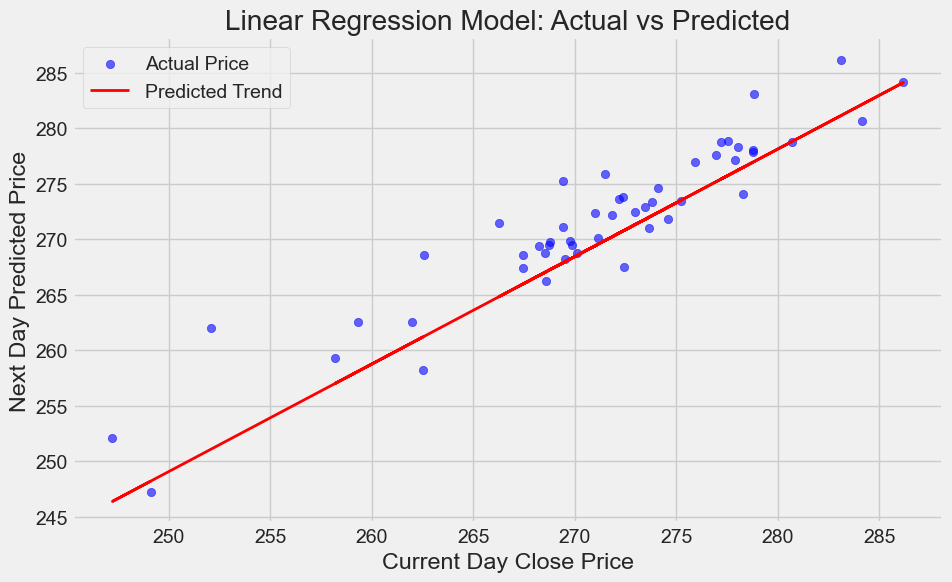

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Prepare the Data
ml_df = company_data['AAPL'][['Close']].copy()

# Create 'Prediction' column shifted by -1 day
ml_df['Prediction'] = ml_df['Close'].shift(-1)

# Drop the last row (it has no Next Day Price to learn from)
data_for_training = ml_df.dropna()

# Define X (Features) and y (Target)
X = np.array(data_for_training[['Close']])
y = np.array(data_for_training['Prediction'])

# 2. Split Data (80% Training, 20% Testing)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 3. Train the Model
lr = LinearRegression()
lr.fit(x_train, y_train)

# 4. Test the Model
lr_confidence = lr.score(x_test, y_test)
print(f"Model Accuracy (R^2 Score): {lr_confidence:.2%}")

# 5. Predict the Next Day's Price
# FIX: Force the value to be a simple float to avoid dimension errors
last_close_value = float(ml_df['Close'].iloc[-1])
last_row_price = np.array([[last_close_value]])

prediction = lr.predict(last_row_price)

print(f"--------------------------------------")
print(f"Apple (AAPL) Last Closing Price: ${last_close_value:.2f}")
print(f"Predicted Price for Next Trading Day: ${float(prediction[0]):.2f}")
print(f"--------------------------------------")

# Optional: Visualize
predictions = lr.predict(x_test)
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, color='blue', label='Actual Price', alpha=0.6)
plt.plot(x_test, predictions, color='red', linewidth=2, label='Predicted Trend')
plt.title('Linear Regression Model: Actual vs Predicted')
plt.xlabel('Current Day Close Price')
plt.ylabel('Next Day Predicted Price')
plt.legend()
plt.show()